# SteamSpy Video Game Analysis

<div class="span5 alert alert-info">
    <b>Note:</b> I created this notebook to analyze gaming data from SteamSpy.
</div>

- [Imports](#imports)
- [Requests](#Requests)
- [Data Wrangling](#wrangling)
- [Visualizations](#viz)

<a id=imports></a>

## Imports

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import re
import warnings
import datetime as dt
warnings.filterwarnings("ignore")

<a id=Requests></a>

## Requests

In [4]:
#r = requests.get('https://steamspy.com/')
#print(r.status_code) # will tell us if we gained access or not
#print(r.ok)  
#r = requests.get('https://steamspy.com/')
#df_list = pd.read_html(r.text)
#df=df_list[2].head(30)

200
True


<a id=wrangling></a>

## Data Wrangling

<a id=main></a>

In [10]:
df = pd.read_excel('data/Steamspy.xlsx')

In [11]:
df.head()

,#,Game,Release date,Price,Score rank(Userscore / Metascore),Owners,Players,Playtime (Median)
0,1,Counter-Strike: Global Offensive,2012-08-21,Free,N/A (N/A/83%),"100,000,000 .. 200,000,000",0.1925,15:12 (05:46)
1,2,Dota 2,2013-07-09,Free,N/A (N/A/90%),"100,000,000 .. 200,000,000",0.1288,28:50 (11:49)
2,3,Among Us,2018-11-16,4.99,N/A (N/A),"10,000,000 .. 20,000,000",0.7519,07:11 (04:55)
3,4,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,29.99,N/A (N/A/86%),"20,000,000 .. 50,000,000",0.1114,09:13 (03:49)
4,5,Tom Clancy's Rainbow Six Siege,2015-12-01,19.99,N/A (N/A),"20,000,000 .. 50,000,000",0.1551,13:00 (05:44)


In [12]:
df['Release date'] = pd.to_datetime(df['Release date'],format='%b %d, %Y')

In [13]:
df.columns = ['#', 'Game', 'Release date', 'Price', 'Metascore', 'Owners', 'Players','Playtime (Median)']

In [14]:
test_string = '''0     N/A (N/A/83%)'''

In [15]:
# getting required result from string  
res = re.findall('\d*%', test_string) 
  
# printing result  
print(res)  

['83%']


In [16]:
test = [x.split('/') for x in df['Metascore']]

In [17]:
empty = []
for i in df['Metascore']:
    res = re.findall('\d*%', i) 

    if not res:
        empty.append(0)
    else:
        empty.append(res[0])
    
print(empty)

['83%', '90%', 0, '86%', 0, '92%', '79%', 0, '80%', '96%', '69%', '71%', '69%', '86%', '83%', 0, '73%', '88%', '90%', 0, '91%', '74%', '89%', 0, '79%', '93%', '87%', '83%', 0, 0, '85%', '87%', '74%', '89%', '81%', 0, '87%', 0, '74%', 0, '76%', '83%', '86%', '85%', '81%', '83%', 0, '85%', 0, '81%', 0, '78%', '70%', 0, 0, 0, '88%', '92%', '83%', '81%', '72%', '84%', 0, '89%', '74%', '82%', '93%', '68%', '87%', 0, '78%', '78%', 0, '84%', '86%', '89%', 0, 0, 0, 0, 0, 0, 0, '78%', '83%', '93%', '70%', 0, '80%', '80%', 0, '82%', '81%', 0, '76%', '75%', 0, '88%']


In [18]:
final_list = []
for i in empty:
    final_list.append(int(str(i).replace('%','')))

In [19]:
df['Metascore'] = final_list

In [20]:
df['Price'].unique()

array(['Free', 4.99, 29.99, 19.99, 9.99, 39.99, 44.99, 49.99, 59.99,
       14.99, 34.99, 24.99, 30, nan, 11.99, 3.99], dtype=object)

<br>
<a id=help></a>

In [21]:
df['Price'] = df['Price'].map({'Free':0, '$19.99':19.99,'$29.99':29.99,'$3.99':3.99,'$9.99':9.99,'$7.99':7.99,
                 '$39.99':39.99,'$4.99':4.99,'$59.99':59.99,'$49.99':49.99,'$24.99':24.99})

In [24]:
avg_time = []
median_time = []
for i in df['Playtime (Median)']:
    avg_time.append(i.split(' ')[0])
    median_time.append(i.split(' ')[1])

In [25]:
df['Avg_Playtime'] = avg_time

In [26]:
df['Median_Playtime'] = median_time

In [27]:
df.Owners.unique()

array(['100,000,000\xa0..\xa0200,000,000',
       '10,000,000\xa0..\xa020,000,000', '20,000,000\xa0..\xa050,000,000',
       '50,000,000\xa0..\xa0100,000,000', '5,000,000\xa0..\xa010,000,000',
       '2,000,000\xa0..\xa05,000,000', '1,000,000\xa0..\xa02,000,000',
       '500,000\xa0..\xa01,000,000', '200,000\xa0..\xa0500,000',
       '50,000\xa0..\xa0100,000', '100,000\xa0..\xa0200,000'],
      dtype=object)

In [59]:
ContentDict = {'50,000,000\xa0..\xa0100,000,000':'50M-100M', '100,000,000\xa0..\xa0200,000,000':'100M-200M',
               '5,000,000\xa0..\xa010,000,000':'5M-10M', '20,000,000\xa0..\xa050,000,000':'20M-50M',
             '10,000,000\xa0..\xa020,000,000':'10M-20M', '200,000\xa0..\xa0500,000':'0.2M-0.5M',
              '2,000,000\xa0..\xa05,000,000':'2M-5M','500,000\xa0..\xa01,000,000':'0.5M-1M', 
               '1,000,000\xa0..\xa02,000,000':'1M-2M', '50,000\xa0..\xa0100,000':'0.05M-0.1M',
              '100,000\xa0..\xa0200,000':'0.1M-0.2M'}

In [64]:
df['Owners'] = df.Owners.map(ContentDict)

In [167]:
MinimumDict = {'50M-100M':50, '100M-200M':100,'5M-10M':5, '20M-50M':20,
             '10M-20M':10, '0.2M-0.5M':0.2,'2M-5M':2, '0.5M-1M':0.5, 
               '1M-2M':1, '0.05M-0.1M':0.05,'0.1M-0.2M':0.1}
MaximumDict = {'50M-100M':100, '100M-200M':200,'5M-10M':10, '20M-50M':50,
             '10M-20M':20, '0.2M-0.5M':0.5,'2M-5M':5, '0.5M-1M':1, 
               '1M-2M':2, '0.05M-0.1M':0.1,'0.1M-0.2M':0.2}

In [170]:
df['Min_Owners'] = df.Owners.map(MinimumDict)
df['Max_Owners'] = df.Owners.map(MaximumDict)
df['Avg_Owners'] = (df['Min_Owners'] + df['Max_Owners']) / 2

In [173]:
df['Number_Players'] = df['Avg_Owners'] * df['Players']

In [174]:
df_sub = df.iloc[:20,:]

In [175]:
df_sub = df_sub.iloc[:20,:]

In [176]:
df_sub = df_sub.sort_values(by=['Release date'])

In [177]:
df_sub['Concat'] = df_sub['Game'].map(str) + " - " + df_sub['Release date'].astype('str')

In [178]:
df_sub.head()

,#,Game,Release date,Price,Metascore,Owners,Players,Playtime (Median),Avg_Playtime,Median_Playtime,Min_Owners,Max_Owners,Avg_Owners,Number_Players,Concat
5,6,Team Fortress 2,2007-10-10,0.0,92,50M-100M,0.0491,34:30 (07:46),34:30,(07:46),50.0,100.0,75.0,3.68250,Team Fortress 2 - 2007-10-10
18,19,Sid Meier's Civilization V,2010-09-21,NaN,90,5M-10M,0.0383,20:45 (18:20),20:45,(18:20),5.0,10.0,7.5,0.28725,Sid Meier's Civilization V - 2010-09-21
0,1,Counter-Strike: Global Offensive,2012-08-21,0.0,83,100M-200M,0.1925,15:12 (05:46),15:12,(05:46),100.0,200.0,150.0,28.87500,Counter-Strike: Global Offensive - 2012-08-21
12,13,Warframe,2013-03-25,0.0,69,20M-50M,0.0524,14:07 (09:55),14:07,(09:55),20.0,50.0,35.0,1.83400,Warframe - 2013-03-25
1,2,Dota 2,2013-07-09,0.0,90,100M-200M,0.1288,28:50 (11:49),28:50,(11:49),100.0,200.0,150.0,19.32000,Dota 2 - 2013-07-09


In [ ]:
df[]

<a id=viz></a>

## Visualizations

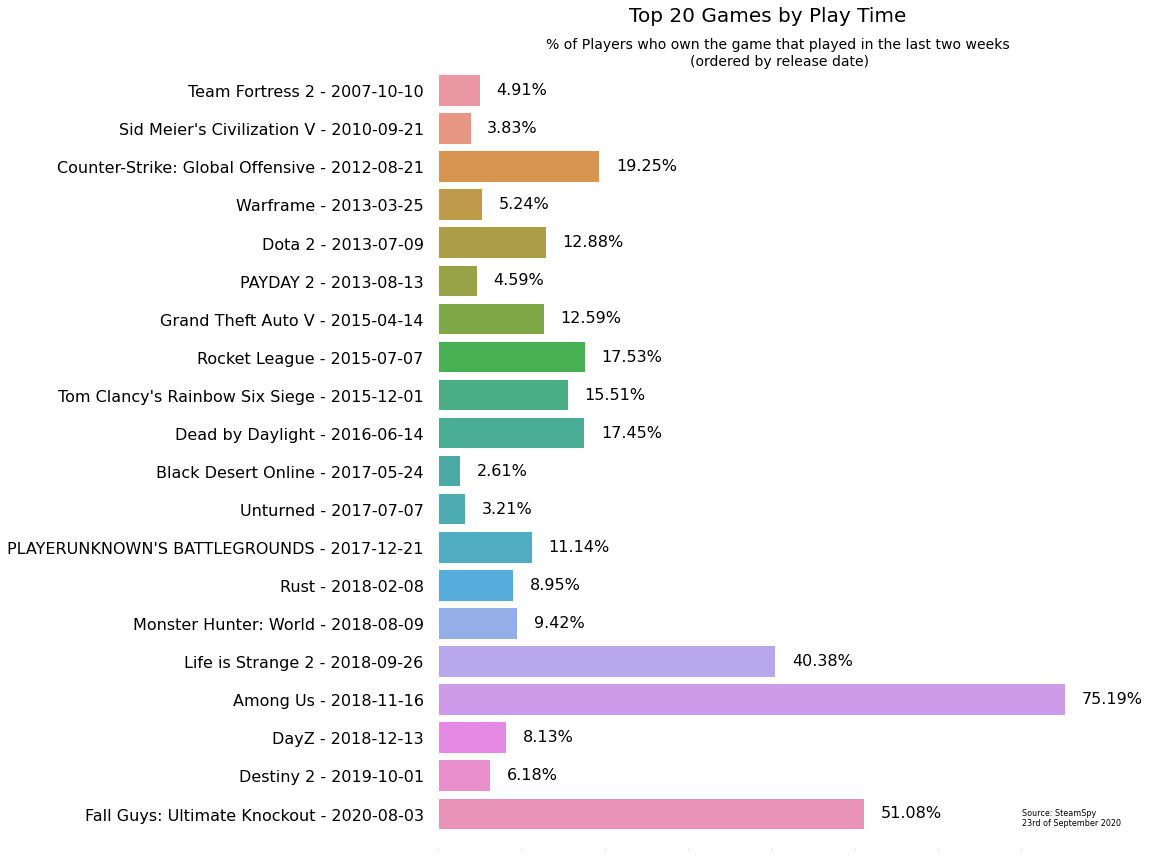

In [186]:
plt.figure(figsize=(16,12))

ax = sns.barplot(x='Players',y='Concat', data=df_sub, orient='h')
plt.title('Top 20 Games by Play Time', size=20, pad=50)
plt.figtext(.68,.92,'% of Players who own the game that played in the last two weeks \n(ordered by release date)',fontsize=14,ha='center')          
plt.xticks(fontsize=0)
plt.yticks(fontsize=16)
plt.ylabel('')
plt.xlabel('')

# decorations
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)
ax.annotate('Source: SteamSpy \n23rd of September 2020', (0.7,19.3), fontsize=8)

for (i, v), num in zip(enumerate(df_sub['Players']), df_sub['Number_Players']):
    ax.text(v+0.02, i+0.1, str(round(v*100,2))+'%', color='black', size=16)

plt.tight_layout()
plt.savefig('img/Top_Games_by_Play_Time.png', transparent=True, dpi=200)
plt.show()

In [208]:
df_sub = df.sort_values(by='Number_Players', ascending=False)
df_sub = df.iloc[:20,:]
df_sub = df_sub.sort_values(by='Release date', ascending=True)
df_sub['Concat'] = df_sub['Game'].map(str) + " - " + df_sub['Release date'].astype('str')

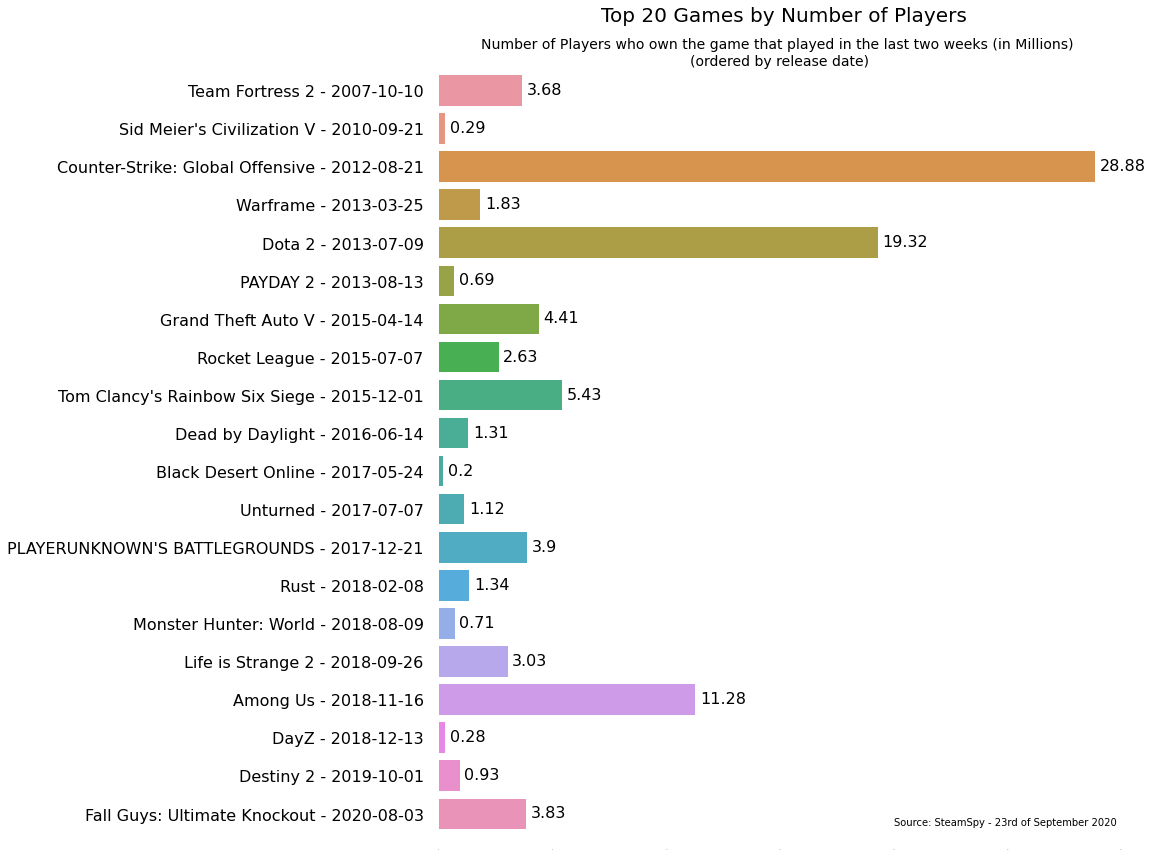

In [214]:
plt.figure(figsize=(16,12))

ax = sns.barplot(x='Number_Players',y='Concat', data=df_sub, orient='h')
plt.title('Top 20 Games by Number of Players', size=20, pad=50)
plt.figtext(.68,.92,'Number of Players who own the game that played in the last two weeks (in Millions) \n(ordered by release date)',fontsize=14,ha='center')          
plt.xticks(fontsize=0)
plt.yticks(fontsize=16)
plt.ylabel('')
plt.xlabel('')

# decorations
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)
ax.annotate('Source: SteamSpy - 23rd of September 2020', (20,19.3), fontsize=10)

for (i, v), num in zip(enumerate(df_sub['Number_Players']), df_sub['Number_Players']):
    ax.text(v+0.2, i+0.1, str(round(num,2)), color='black', size=16)

plt.tight_layout()
plt.savefig('img/Top_Games_by_Play_Time_.png', transparent=True, dpi=200)
plt.show()

In [249]:
df_sub = df.sort_values('#', ascending=True)

In [250]:
df_sub['Concat_Score'] = df_sub['Game'].map(str) + " - " + df_sub['Metascore'].astype('str')

In [252]:
empty_list = []
for i in df_sub['Avg_Playtime']:
    empty_list.append(float(str(i).replace(':','.')))

df_sub['Avg_Playtime'] = empty_list

In [253]:
import math

def to_t_delt(number):
    return pd.to_timedelta(f'{math.floor(number)}hours {(number - math.floor(number)) * 100}min')


In [255]:
df_sub['Daily_Playtime'] = df_sub[['Avg_Playtime']].applymap(to_t_delt) / 14

In [256]:
df_sub = df_sub.sort_values(by='Daily_Playtime', ascending=False).iloc[2:22,:]

In [293]:
my_list = []
for i in df_sub['Daily_Playtime'].astype(str):
    split = i.split(' ')[2]
    my_list.append(split[:8])


In [294]:
df_sub['Daily_Playtime'] = my_list 

In [309]:
df_sub['Hour'] = pd.to_datetime(df_sub['Daily_Playtime'], format='%H:%M:%S').dt.hour

In [308]:
df_sub['Minute'] = pd.to_datetime(df_sub['Daily_Playtime'], format='%H:%M:%S').dt.minute

In [319]:
df_sub.head()

,#,Game,Release date,Price,Metascore,Owners,Players,Playtime (Median),Avg_Playtime,Median_Playtime,Min_Owners,Max_Owners,Avg_Owners,Number_Players,Concat_Score,Daily_Playtime,Hour,Minute
7,8,Unturned,2017-07-07,0.0,0,20M-50M,0.0321,73:23 (48:51),73.23,(48:51),20.0,50.0,35.00,1.12350,Unturned - 0,05:14:30,5,14
55,56,Shakes and Fidget,2016-02-24,0.0,0,1M-2M,0.0769,51:42 (68:41),51.42,(68:41),1.0,2.0,1.50,0.11535,Shakes and Fidget - 0,03:41:34,3,41
93,94,SAO Utils: Beta,2018-03-14,NaN,0,0.1M-0.2M,0.2500,51:39 (34:26),51.39,(34:26),0.1,0.2,0.15,0.03750,SAO Utils: Beta - 0,03:41:21,3,41
50,51,Clicker Heroes,2015-05-13,0.0,0,5M-10M,0.0085,47:56 (19:58),47.56,(19:58),5.0,10.0,7.50,0.06375,Clicker Heroes - 0,03:25:25,3,25
6,7,PAYDAY 2,2013-08-13,NaN,79,10M-20M,0.0459,44:53 (17:56),44.53,(17:56),10.0,20.0,15.00,0.68850,PAYDAY 2 - 79,03:12:21,3,12


TypeError: can only concatenate str (not "int") to str

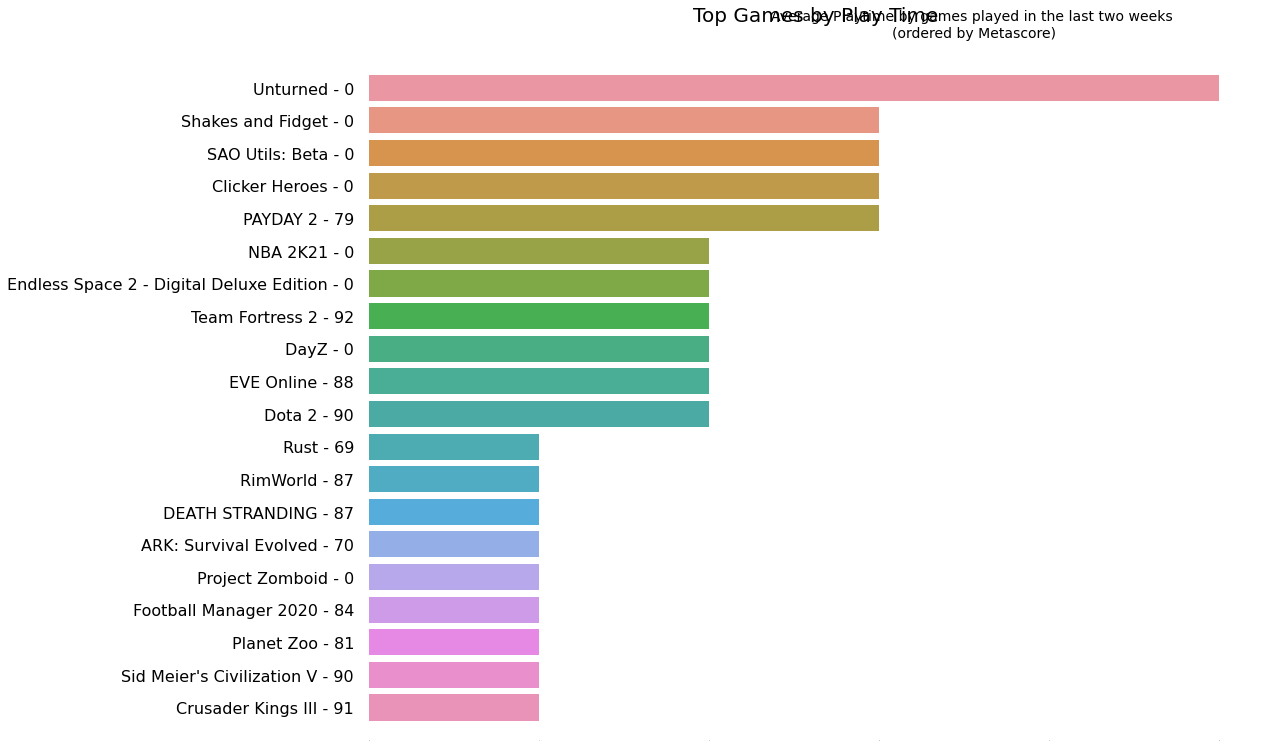

In [320]:
plt.figure(figsize=(16,12))

ax = sns.barplot(x='Hour',y='Concat_Score', data=df_sub.iloc[:20,:], orient='h')
plt.title('Top Games by Play Time', size=20, pad=50)
plt.figtext(.65,.92,'Average Playtime by games played in the last two weeks \n(ordered by Metascore)',fontsize=14,ha='center')          
plt.xticks(fontsize=0)
plt.yticks(fontsize=16)
plt.ylabel('')
plt.xlabel('')

# decorations
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)

for i, v in enumerate(df_sub['Daily_Playtime']):
    ax.text(v + 1, i+0.05, str(v), color='black', size=16)

plt.tight_layout()
plt.savefig('img/Top_Games_by_Play_Time_Avg_T.png')
plt.show()

In [393]:
df_sub['Avg_Playtime'] = empty_list

In [399]:
df_sub = df_sub.sort_values(by='Metascore')

In [160]:
time = 76.6
dt.timedelta(hours=time)


datetime.timedelta(days=3, seconds=16560)

In [161]:
16560/60

276.0

# Netflix Data

In [190]:
netflix = pd.read_excel('data/Netflix_data.xlsx')

In [192]:
netflix['Concat'] = netflix['Name'].map(str) + " - " + netflix['Release Year'].astype('str')

In [198]:
netflix = netflix.sort_values(by='Release Year')

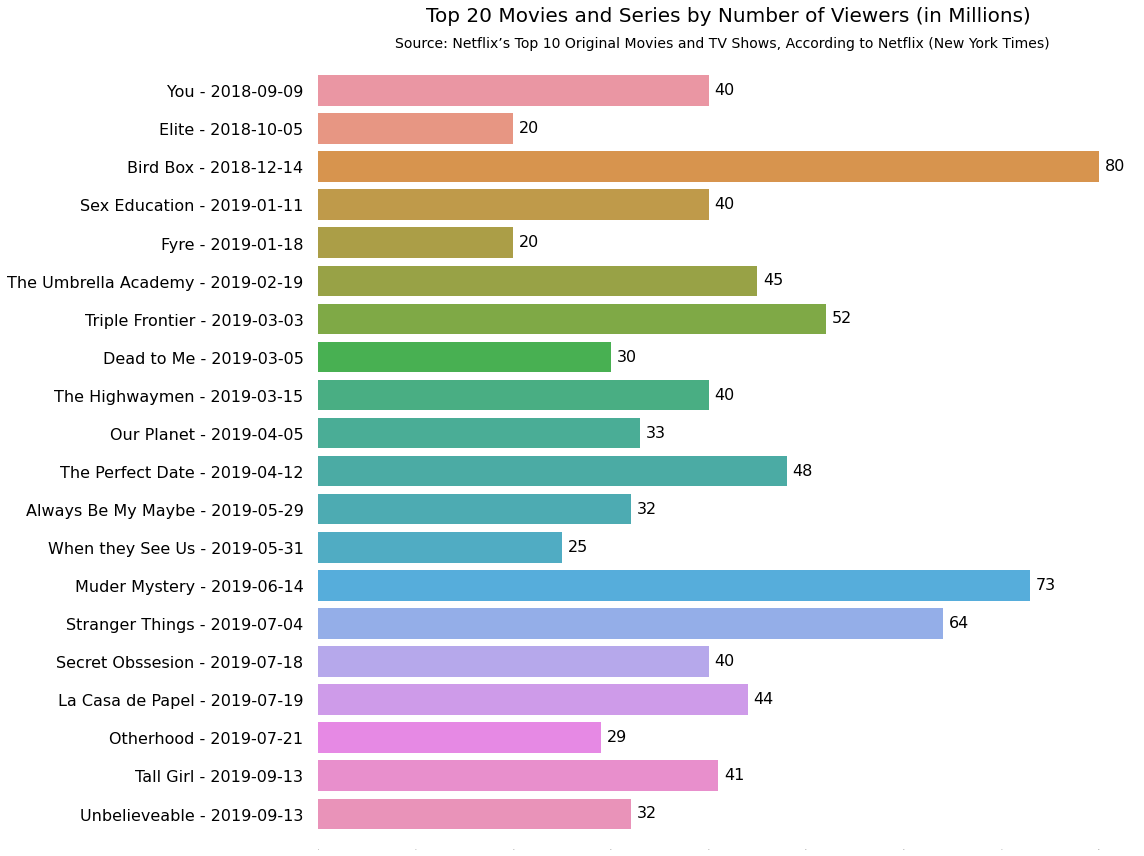

In [203]:
plt.figure(figsize=(16,12))

ax = sns.barplot(x='Amount',y='Concat', data=netflix, orient='h')
plt.title('Top 20 Movies and Series by Number of Viewers (in Millions)', size=20, pad=50)
plt.figtext(.63,.94,'Source: Netflix’s Top 10 Original Movies and TV Shows, According to Netflix (New York Times)',fontsize=14,ha='center')          
plt.xticks(fontsize=0)
plt.yticks(fontsize=16)
plt.ylabel('')
plt.xlabel('')

# decorations
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)
#ax.annotate('Source: SteamSpy \n23rd of September 2020', (0.7,19.3), fontsize=8)

for i, v in enumerate(netflix['Amount']):
    ax.text(v+0.6, i+0.1, str(v), color='black', size=16)

plt.tight_layout()
plt.savefig('img/Netflix_Viewers.png', transparent=True, dpi=200)
plt.show()

In [219]:
netflix_time = pd.read_excel('data/Netflix_data.xlsx', sheet_name='time')

In [221]:
netflix_time

,Group,Hours
0,18+ (Average),4.2
1,18-34,2.0
2,35-49,3.4
3,50-64,5.4
4,65+,6.6
5,Netflix Users (Average),2.0


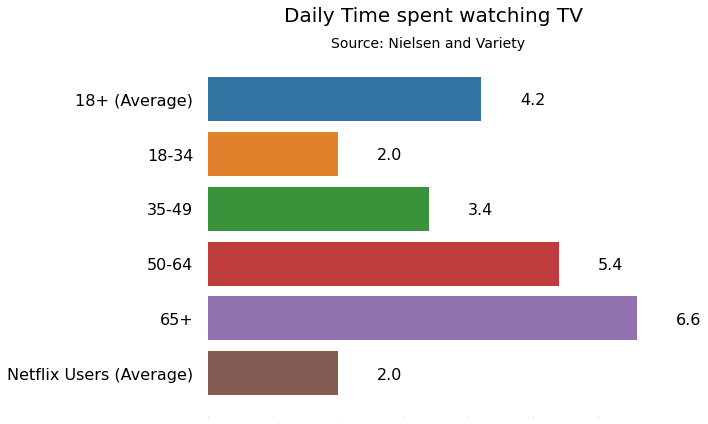

In [230]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='Hours',y='Group', data=netflix_time, orient='h')
plt.title('Daily Time spent watching TV', size=20, pad=50)
plt.figtext(.6,.88,'Source: Nielsen and Variety',fontsize=14,ha='center')          
plt.xticks(fontsize=0)
plt.yticks(fontsize=16)
plt.ylabel('')
plt.xlabel('')

# decorations
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0, pad=15)
#ax.annotate('Source: SteamSpy \n23rd of September 2020', (0.7,19.3), fontsize=8)

for i, v in enumerate(netflix_time['Hours']):
    ax.text(v+0.6, i+0.1, str(v), color='black', size=16)

plt.tight_layout()
plt.savefig('img/Netflix_Time.png', transparent=True, dpi=200)
plt.show()